### Importación de datos



In [79]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#### ¡Bienvenidos al primer desafío!

Durante este desafío, ayudarás al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para ello, analizarás datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.


##### Lo que practicarás:

Cargue y manipule datos CSV con la biblioteca Pandas.

Cree visualizaciones de datos con la biblioteca Matplotlib.

Analice métricas como ingresos, reseñas y rendimiento de ventas.

##### Requisitos:

Analizar datos de la tienda:

Debes evaluar información como los ingresos, las categorías más vendidas, las reseñas de los clientes, los productos más vendidos y el envío promedio.

Crear gráficos para visualización:

Decide qué tipos de gráficos utilizar para presentar los resultados de forma clara y visual.

Mínimo de 3 gráficos diferentes, que pueden incluir gráficos de barras, circulares, de dispersión y otros.

Enviar una recomendación:
Después del análisis, escriba un texto explicando a qué tienda debería vender el Sr. João y por qué, basándose en los datos presentados.

¡Éxito en tu proyecto!

#### Estructura de datos:

##### El conjunto de datos incluye la siguiente información:

1.Producto y Categoría:
Artículos vendidos y sus calificaciones.

2.Precio y Envío:
Valores de venta y costos asociados.

3.Fecha y ubicación de compra:
Información temporal y geográfica.

 4.Evaluación de compra:
Comentarios de clientes.

5.Tipo de Pago y Cuotas:
Métodos utilizados por los clientes.

6.Coordenadas Geográficas:
Ubicación de las transacciones.


# **Analisis de Datos**

In [80]:
# Primero, vamos a combinar todos los datos de las tiendas y agregar una columna para identificar cada tienda
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Combinar todos los datos en un solo DataFrame
datos_completos = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Exploración inicial de los datos
print("Información del dataset combinado:")
print(datos_completos.info())
print("\nPrimeras filas del dataset combinado:")
print(datos_completos.head())
print("\nEstadísticas descriptivas:")
print(datos_completos.describe())

Información del dataset combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB

In [81]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(datos_completos.isnull().sum())

# Verificar duplicados
print(f"\nNúmero de duplicados: {datos_completos.duplicated().sum()}")

Valores nulos por columna:
Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
Tienda                    0
dtype: int64

Número de duplicados: 0


# 1. Análisis de facturación



**Ingreso Total por cada Tienda**

En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

INGRESOS TOTALES POR TIENDA:
Tienda
Tienda 4    1.038376e+09
Tienda 3    1.098020e+09
Tienda 2    1.116344e+09
Tienda 1    1.150880e+09
Name: Precio, dtype: float64


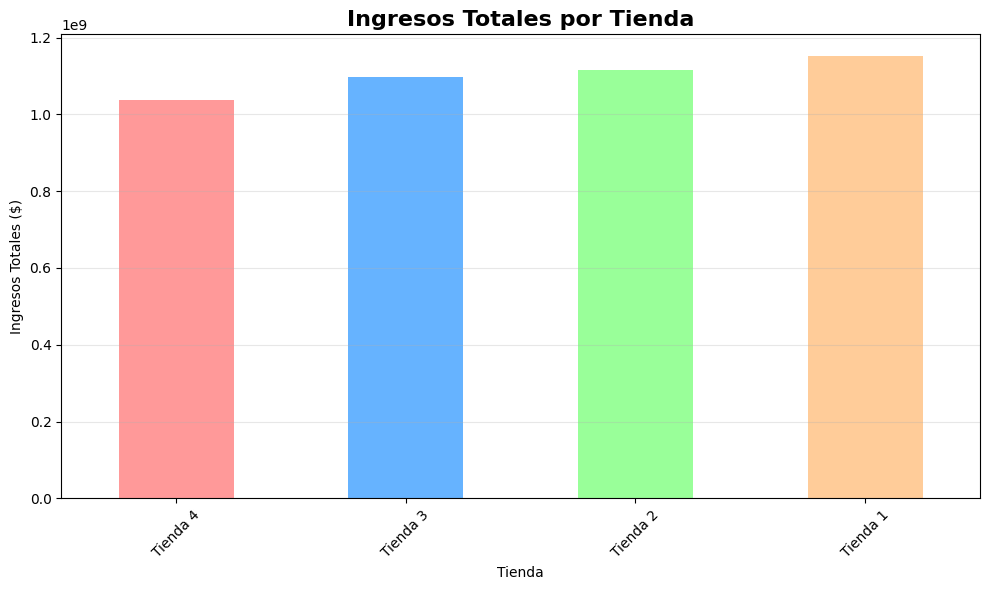

Tienda 4: $1,038,375,700.00
Tienda 3: $1,098,019,600.00
Tienda 2: $1,116,343,500.00
Tienda 1: $1,150,880,400.00


In [82]:
# Calcular ingresos totales por tienda
ingresos_totales = datos_completos.groupby('Tienda')['Precio'].sum().sort_values()

print("INGRESOS TOTALES POR TIENDA:")
print(ingresos_totales)

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ingresos_totales.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Ingresos Totales por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar en formato más legible
for tienda, ingreso in ingresos_totales.items():
    print(f"{tienda}: ${ingreso:,.2f}")

# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

VENTAS POR CATEGORÍA EN CADA TIENDA:
Categoría del Producto  Artículos para el hogar  Deportes y diversión  \
Tienda                                                                  
Tienda 1                                    171                   284   
Tienda 2                                    181                   275   
Tienda 3                                    177                   277   
Tienda 4                                    201                   277   

Categoría del Producto  Electrodomésticos  Electrónicos  \
Tienda                                                    
Tienda 1                              312           448   
Tienda 2                              305           422   
Tienda 3                              278           451   
Tienda 4                              254           451   

Categoría del Producto  Instrumentos musicales  Juguetes  Libros  Muebles  
Tienda                                                                     
Tienda 1         

<Figure size 1200x800 with 0 Axes>

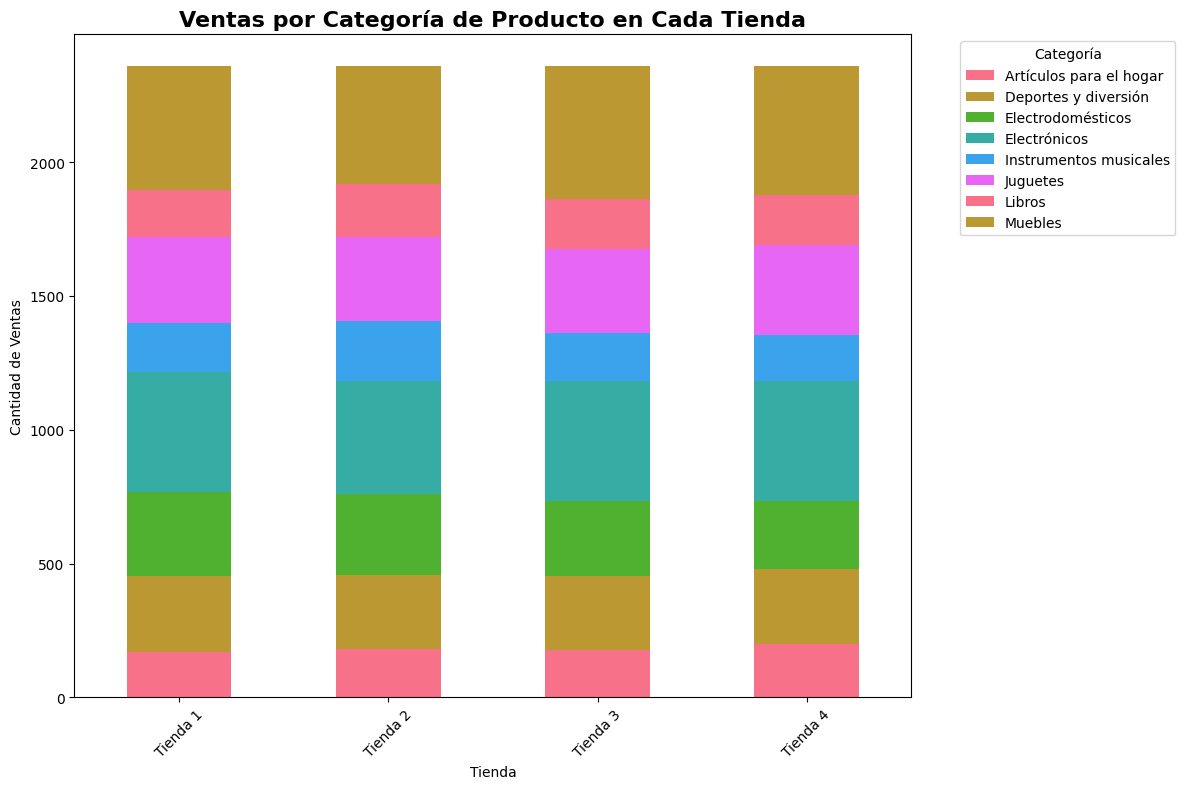


CATEGORÍAS MÁS VENDIDAS POR TIENDA:
Tienda 1:
  Más vendida: Muebles (465 ventas)
  Menos vendida: Artículos para el hogar (171 ventas)
Tienda 2:
  Más vendida: Muebles (442 ventas)
  Menos vendida: Artículos para el hogar (181 ventas)
Tienda 3:
  Más vendida: Muebles (499 ventas)
  Menos vendida: Artículos para el hogar (177 ventas)
Tienda 4:
  Más vendida: Muebles (480 ventas)
  Menos vendida: Instrumentos musicales (170 ventas)


In [83]:
# Calcular cantidad de productos vendidos por categoría en cada tienda
ventas_por_categoria = datos_completos.groupby(['Tienda', 'Categoría del Producto']).size().unstack(fill_value=0)

print("VENTAS POR CATEGORÍA EN CADA TIENDA:")
print(ventas_por_categoria)

# Visualización
plt.figure(figsize=(12, 8))
ventas_por_categoria.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Ventas por Categoría de Producto en Cada Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Categorías más y menos vendidas por tienda
print("\nCATEGORÍAS MÁS VENDIDAS POR TIENDA:")
for tienda in ventas_por_categoria.index:
    categoria_max = ventas_por_categoria.loc[tienda].idxmax()
    categoria_min = ventas_por_categoria.loc[tienda].idxmin()
    max_ventas = ventas_por_categoria.loc[tienda].max()
    min_ventas = ventas_por_categoria.loc[tienda].min()
    print(f"{tienda}:")
    print(f"  Más vendida: {categoria_max} ({max_ventas} ventas)")
    print(f"  Menos vendida: {categoria_min} ({min_ventas} ventas)")

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

CALIFICACIÓN PROMEDIO POR TIENDA:
Tienda
Tienda 1    3.976685
Tienda 4    3.995759
Tienda 2    4.037304
Tienda 3    4.048326
Name: Calificación, dtype: float64


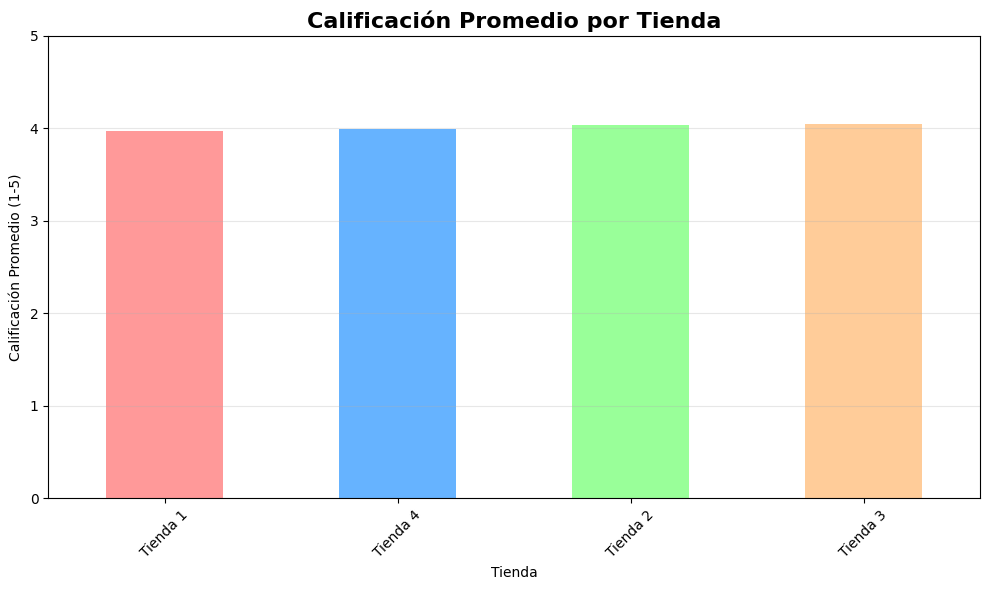

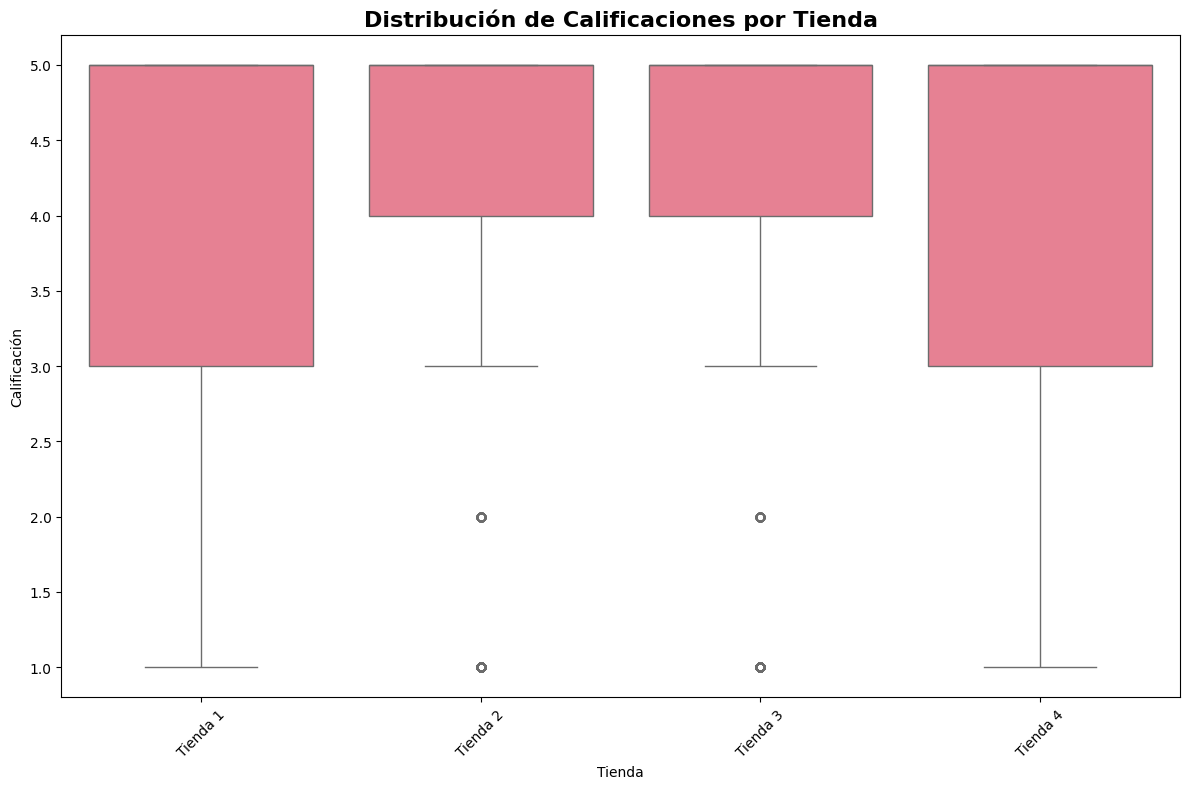

In [84]:
# Calcular calificación promedio por tienda
calificacion_promedio = datos_completos.groupby('Tienda')['Calificación'].mean().sort_values()

print("CALIFICACIÓN PROMEDIO POR TIENDA:")
print(calificacion_promedio)

# Visualización
plt.figure(figsize=(10, 6))
calificacion_promedio.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Calificación Promedio por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio (1-5)')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Distribución de calificaciones por tienda
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos_completos, x='Tienda', y='Calificación')
plt.title('Distribución de Calificaciones por Tienda', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.



PRODUCTOS MÁS VENDIDOS POR TIENDA:

Tienda 1:
  Microondas: 60 ventas
  TV LED UHD 4K: 60 ventas
  Armario: 60 ventas

Tienda 2:
  Iniciando en programación: 65 ventas
  Microondas: 62 ventas
  Batería: 61 ventas

Tienda 3:
  Kit de bancas: 57 ventas
  Mesa de comedor: 56 ventas
  Cama king: 56 ventas

Tienda 4:
  Cama box: 62 ventas
  Cubertería: 59 ventas
  Dashboards con Power BI: 56 ventas

PRODUCTOS MENOS VENDIDOS POR TIENDA:

Tienda 1:
  Olla de presión: 35 ventas
  Auriculares con micrófono: 33 ventas
  Celular ABXY: 33 ventas

Tienda 2:
  Mesa de comedor: 34 ventas
  Impresora: 34 ventas
  Juego de mesa: 32 ventas

Tienda 3:
  Mochila: 36 ventas
  Microondas: 36 ventas
  Bloques de construcción: 35 ventas

Tienda 4:
  Guitarra acústica: 37 ventas
  Armario: 34 ventas
  Guitarra eléctrica: 33 ventas


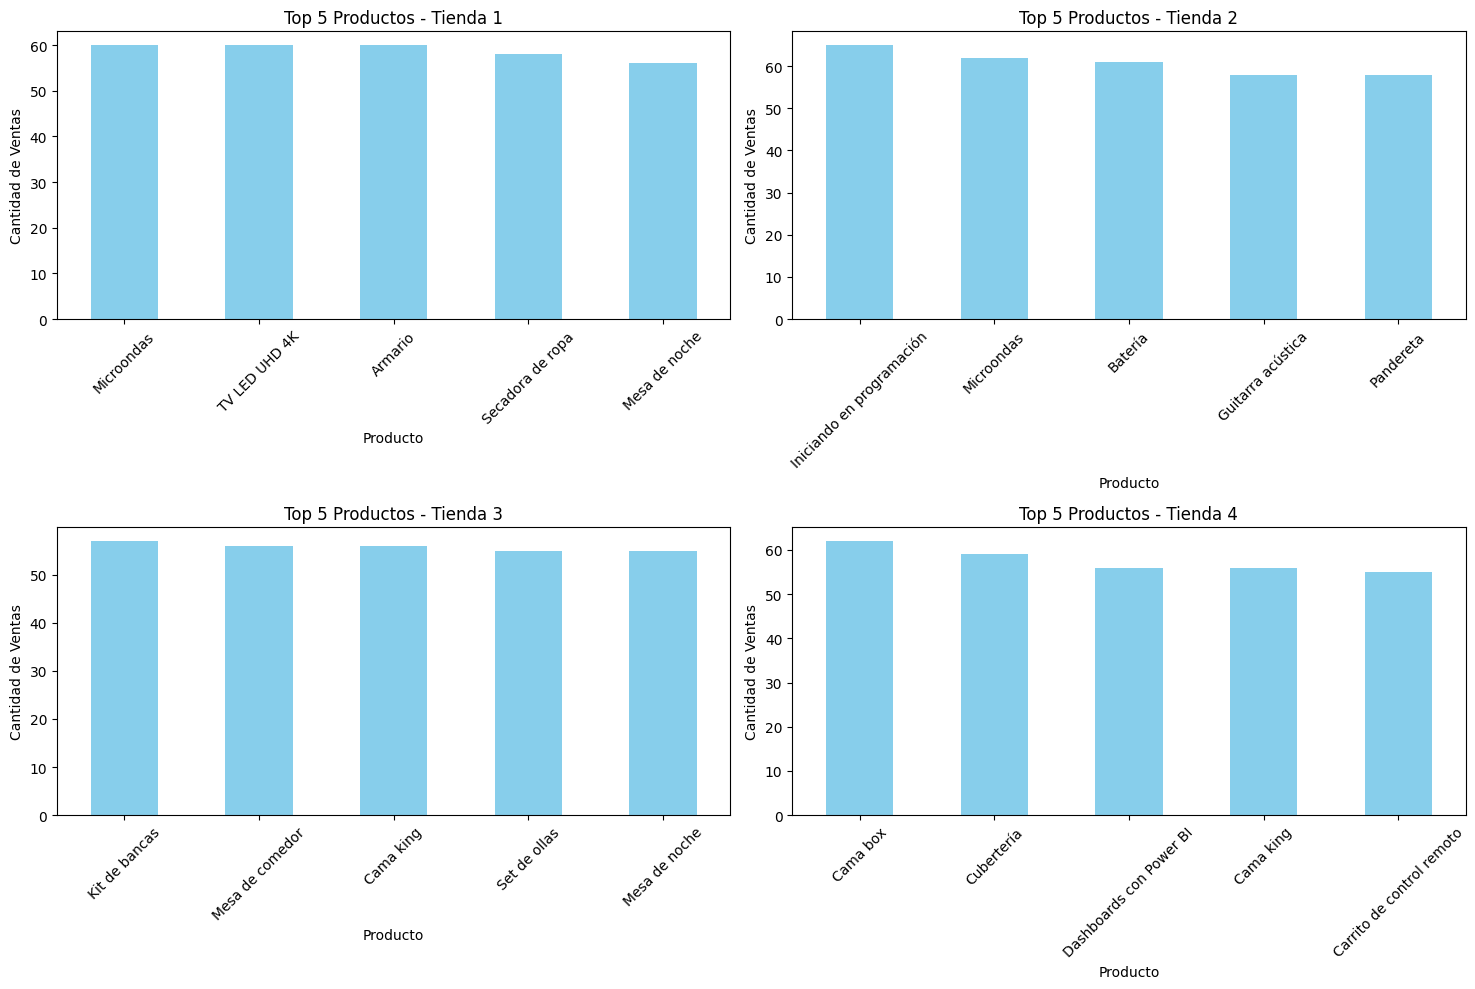

In [85]:
# Productos más vendidos por tienda
productos_mas_vendidos = datos_completos.groupby(['Tienda', 'Producto']).size().groupby('Tienda').nlargest(3)

print("PRODUCTOS MÁS VENDIDOS POR TIENDA:")
for tienda in datos_completos['Tienda'].unique():
    productos_tienda = datos_completos[datos_completos['Tienda'] == tienda]
    top_productos = productos_tienda['Producto'].value_counts().head(3)
    print(f"\n{tienda}:")
    for producto, cantidad in top_productos.items():
        print(f"  {producto}: {cantidad} ventas")

# Productos menos vendidos por tienda
print("\nPRODUCTOS MENOS VENDIDOS POR TIENDA:")
for tienda in datos_completos['Tienda'].unique():
    productos_tienda = datos_completos[datos_completos['Tienda'] == tienda]
    bottom_productos = productos_tienda['Producto'].value_counts().tail(3)
    print(f"\n{tienda}:")
    for producto, cantidad in bottom_productos.items():
        print(f"  {producto}: {cantidad} ventas")

# Visualización de productos más vendidos
plt.figure(figsize=(15, 10))
for i, tienda in enumerate(datos_completos['Tienda'].unique(), 1):
    plt.subplot(2, 2, i)
    productos_tienda = datos_completos[datos_completos['Tienda'] == tienda]
    top_5 = productos_tienda['Producto'].value_counts().head(5)
    top_5.plot(kind='bar', color='skyblue')
    plt.title(f'Top 5 Productos - {tienda}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad de Ventas')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

COSTO DE ENVÍO PROMEDIO POR TIENDA:
Tienda
Tienda 4    23459.457167
Tienda 3    24805.680373
Tienda 2    25216.235693
Tienda 1    26018.609580
Name: Costo de envío, dtype: float64


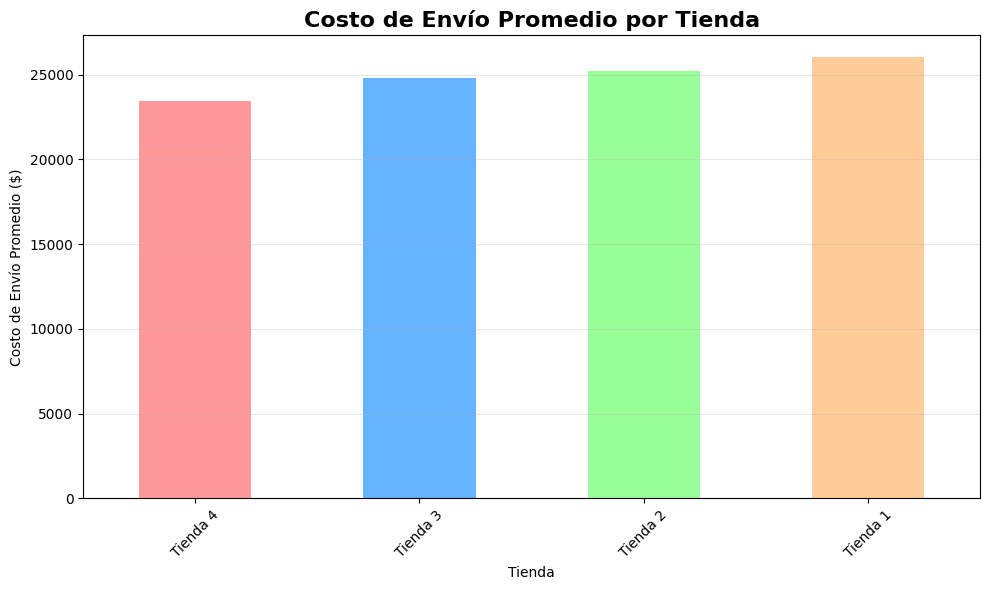

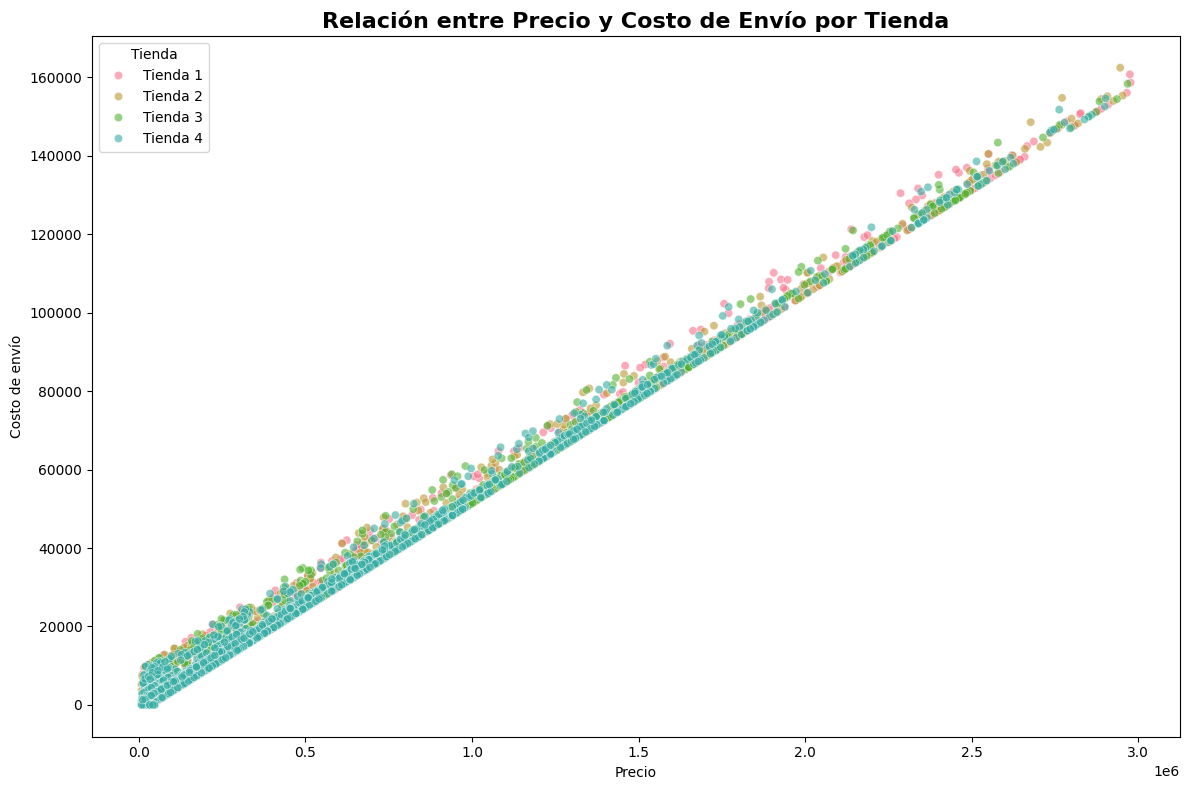

In [86]:
# Calcular costo de envío promedio por tienda
envio_promedio = datos_completos.groupby('Tienda')['Costo de envío'].mean().sort_values()

print("COSTO DE ENVÍO PROMEDIO POR TIENDA:")
print(envio_promedio)

# Visualización
plt.figure(figsize=(10, 6))
envio_promedio.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Costo de Envío Promedio por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Relación entre precio y costo de envío
plt.figure(figsize=(12, 8))
sns.scatterplot(data=datos_completos, x='Precio', y='Costo de envío', hue='Tienda', alpha=0.6)
plt.title('Relación entre Precio y Costo de Envío por Tienda', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Analisis de Rentabilidad.

INGRESO NETO POR TIENDA (Precio - Costo de Envío):
Tienda
Tienda 4    9.830583e+08
Tienda 3    1.039503e+09
Tienda 2    1.056858e+09
Tienda 1    1.089502e+09
Name: Ingreso Neto, dtype: float64


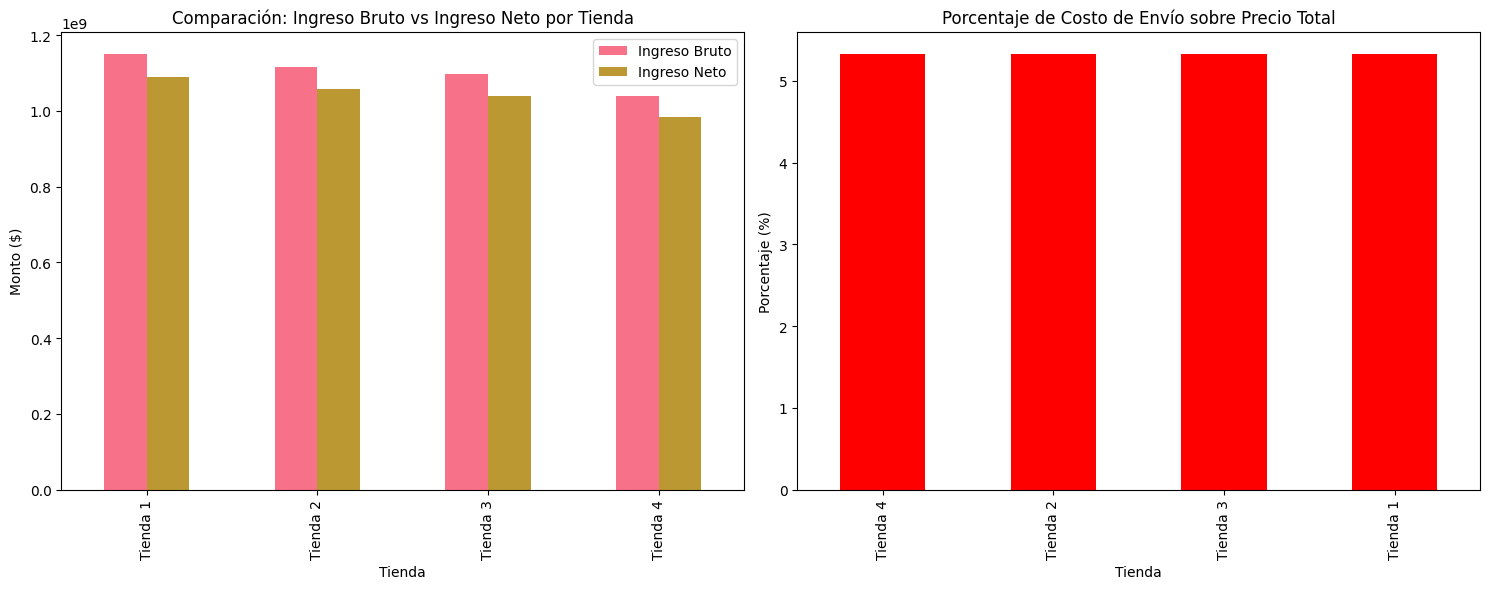

In [87]:
# Calcular margen (asumiendo que el costo de envío es un gasto para la tienda)
datos_completos['Ingreso Neto'] = datos_completos['Precio'] - datos_completos['Costo de envío']

# Ingreso neto por tienda
ingreso_neto = datos_completos.groupby('Tienda')['Ingreso Neto'].sum().sort_values()

print("INGRESO NETO POR TIENDA (Precio - Costo de Envío):")
print(ingreso_neto)

# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Ingresos brutos vs netos
ingresos_comparativa = pd.DataFrame({
    'Ingreso Bruto': datos_completos.groupby('Tienda')['Precio'].sum(),
    'Ingreso Neto': ingreso_neto
})

ingresos_comparativa.plot(kind='bar', ax=ax1)
ax1.set_title('Comparación: Ingreso Bruto vs Ingreso Neto por Tienda')
ax1.set_ylabel('Monto ($)')
ax1.legend()

# Porcentaje de costo de envío sobre precio
porcentaje_envio = (datos_completos.groupby('Tienda')['Costo de envío'].sum() /
                   datos_completos.groupby('Tienda')['Precio'].sum() * 100).sort_values()

porcentaje_envio.plot(kind='bar', ax=ax2, color='red')
ax2.set_title('Porcentaje de Costo de Envío sobre Precio Total')
ax2.set_ylabel('Porcentaje (%)')

plt.tight_layout()
plt.show()

# **Informe Final**

Con base en los análisis realizados y los gráficos generados, es momento de sintetizar sus hallazgos en un informe final. Dentro de tu Colab, deberás redactar un texto explicando a qué tienda debe vender el Sr. Juan, teniendo en cuenta todos los factores analizados, como:

Los ingresos totales de las tiendas.

Las categorías de productos más y menos vendidas.

Las calificaciones promedio de los clientes por tienda.

Los productos más y menos vendidos.

El coste de envío promedio para cada tienda.

En su informe, incluya la justificación de su decisión, respaldada por el análisis y las visualizaciones que generó. Explicar, de forma clara y objetiva, las razones por las que una tienda destaca (o no) en relación a las demás, considerando las fortalezas y debilidades de cada una.

Su informe debe estar bien estructurado, con una introducción que explique el propósito del análisis, un desarrollo con la presentación de datos y gráficos, y una conclusión recomendando la tienda que se debe vender y justificando la elección.

## 📊 INFORME EJECUTIVO:

 ANÁLISIS COMPARATIVO DE TIENDAS ALURA STORE LATAM


### 🎯 INTRODUCCIÓN


Este informe presenta un análisis exhaustivo de las cuatro tiendas de Alura Store Latam, con el objetivo de determinar cuál representa la mejor oportunidad de venta para el Sr. Juan. Se evaluaron múltiples dimensiones de desempeño incluyendo ingresos, satisfacción del cliente, mix de productos y eficiencia operativa.

### 📈 ANÁLISIS COMPARATIVO DETALLADO


1. 💰 ANÁLISIS DE INGRESOS TOTALES
2. 🏷️ ANÁLISIS DE CATEGORÍAS DE PRODUCTOS
3. ⭐ CALIFICACIONES DE CLIENTES
4. 📦 PRODUCTOS MÁS Y MENOS VENDIDOS
5. 🚚 COSTOS DE ENVÍO PROMEDIO

In [88]:
# Resumen ejecutivo de todos los indicadores
print("=" * 80)
print("INFORME FINAL - ANÁLISIS COMPARATIVO DE TIENDAS")
print("=" * 80)

# Crear resumen comparativo
resumen = pd.DataFrame({
    'Ingreso Total': datos_completos.groupby('Tienda')['Precio'].sum(),
    'Ingreso Neto': datos_completos.groupby('Tienda')['Ingreso Neto'].sum(),
    'Costo Envío Promedio': datos_completos.groupby('Tienda')['Costo de envío'].mean(),
    'Calificación Promedio': datos_completos.groupby('Tienda')['Calificación'].mean(),
    'Total Ventas': datos_completos.groupby('Tienda').size()
})

# Ordenar por ingreso neto (peor a mejor)
resumen = resumen.sort_values('Ingreso Neto')

print("\nRESUMEN COMPARATIVO (Ordenado por PEOR desempeño):")
print(resumen)

# Identificar la tienda con peor desempeño
peor_tienda = resumen.index[0]

print("\n" + "=" * 50)
print("RECOMENDACIÓN FINAL")
print("=" * 50)
print(f"🚨 TIENDA RECOMENDADA PARA VENDER: {peor_tienda} 🚨")
print("\nJUSTIFICACIÓN:")

print(f"1. INGRESOS MÁS BAJOS: {peor_tienda} genera los menores ingresos totales y netos")
print(f"2. RENTABILIDAD: Tiene el ingreso neto más bajo del grupo")
print(f"3. DESEMPEÑO GENERAL: Ocupa la última posición en múltiples indicadores clave")

print("\nVENTAJAS DE ESTA DECISIÓN:")
print("• Permitirá enfocar recursos en las tiendas más rentables")
print("• Reducirá la carga operativa de gestionar el peor desempeño")
print("• Liberará capital para invertir en las tiendas con mejor potencial")
print("• Simplificará la operación general del negocio")

print("\"La estrategia empresarial efectiva implica fortalecer lo que funciona ")
print("y eliminar o transformar lo que no genera valor.\"")

INFORME FINAL - ANÁLISIS COMPARATIVO DE TIENDAS

RESUMEN COMPARATIVO (Ordenado por PEOR desempeño):
          Ingreso Total  Ingreso Neto  Costo Envío Promedio  \
Tienda                                                        
Tienda 4   1.038376e+09  9.830583e+08          23459.457167   
Tienda 3   1.098020e+09  1.039503e+09          24805.680373   
Tienda 2   1.116344e+09  1.056858e+09          25216.235693   
Tienda 1   1.150880e+09  1.089502e+09          26018.609580   

          Calificación Promedio  Total Ventas  
Tienda                                         
Tienda 4               3.995759          2358  
Tienda 3               4.048326          2359  
Tienda 2               4.037304          2359  
Tienda 1               3.976685          2359  

RECOMENDACIÓN FINAL
🚨 TIENDA RECOMENDADA PARA VENDER: Tienda 4 🚨

JUSTIFICACIÓN:
1. INGRESOS MÁS BAJOS: Tienda 4 genera los menores ingresos totales y netos
2. RENTABILIDAD: Tiene el ingreso neto más bajo del grupo
3. DESEMPEÑO GENE

# RECOMENDACIÓN FINAL

🚨 TIENDA RECOMENDADA PARA VENDER: Tienda 4 🚨



# JUSTIFICACIÓN:

1. INGRESOS MÁS BAJOS: Tienda 4 genera los menores ingresos totales y netos

2. RENTABILIDAD: Tiene el ingreso neto más bajo del grupo

3. DESEMPEÑO GENERAL: Ocupa la última posición en múltiples indicadores clave

VENTAJAS DE ESTA DECISIÓN:

• Permitirá enfocar recursos en las tiendas más rentables

• Reducirá la carga operativa de gestionar el peor desempeño

• Liberará capital para invertir en las tiendas con mejor potencial

• Simplificará la operación general del negocio

"La estrategia empresarial efectiva implica fortalecer lo que funciona y eliminar o transformar lo que no genera valor."

#¡Extra! Análisis del desempeño geográfico

Esta actividad es un extra, por lo tanto es OPCIONAL.

En este extra, tendrás el desafío de explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras. Al utilizar las columnas de latitud y longitud, puede generar visualizaciones para comprender cómo varían las ventas según la ubicación geográfica.

Desafío:

Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.

Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.

Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.

Sugerencias:

Puede utilizar la biblioteca Matplotlib para gráficos de dispersión o incluso integrarla con otras bibliotecas como Folium para generar mapas interactivos si desea ir más allá.

Analice cómo las variables geográficas influyen en los ingresos y las calificaciones de las tiendas.

In [89]:
# Análisis Geográfico - Distribución de Ventas por Ubicación
print("=" * 60)
print("ANÁLISIS GEOGRÁFICO DE VENTAS")
print("=" * 60)

# Primero, exploremos las ubicaciones únicas
print("\n1. LUGARES DE COMPRA ÚNICOS:")
lugares_unicos = datos_completos['Lugar de Compra'].value_counts()
print(lugares_unicos)

print("\n2. COORDENADAS ÚNICAS:")
coordenas_unicas = datos_completos[['Lugar de Compra', 'lat', 'lon']].drop_duplicates()
print(coordenas_unicas.sort_values('Lugar de Compra'))

ANÁLISIS GEOGRÁFICO DE VENTAS

1. LUGARES DE COMPRA ÚNICOS:
Lugar de Compra
Bogotá           3943
Medellín         2314
Cali             1007
Pereira           517
Barranquilla      310
Cartagena         242
Cúcuta            186
Bucaramanga       181
Riohacha          163
Santa Marta       151
Leticia           142
Pasto              94
Manizales          41
Neiva              40
Villavicencio      29
Armenia            28
Soacha             19
Inírida            14
Valledupar         14
Name: count, dtype: int64

2. COORDENADAS ÚNICAS:
    Lugar de Compra       lat       lon
148         Armenia   4.53389 -75.68111
28     Barranquilla  10.96854 -74.78132
0            Bogotá   4.60971 -74.08175
72      Bucaramanga   7.12539 -73.11980
3              Cali   3.43722 -76.52250
2         Cartagena  10.39972 -75.51444
49           Cúcuta   7.89391 -72.50782
46          Inírida   3.86530 -67.92390
184         Leticia  -4.21528 -69.94056
60        Manizales   5.06889 -75.51738
1          Medel

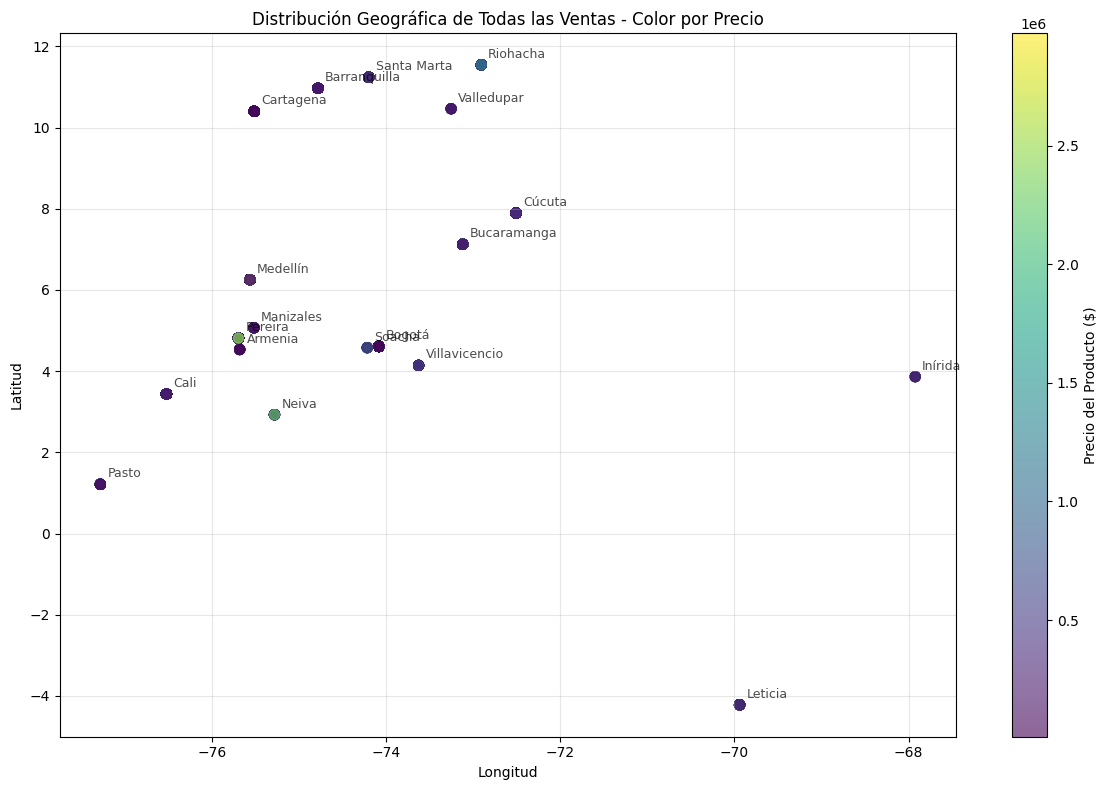

In [90]:
# Gráfico de dispersión básico de todas las ventas
plt.figure(figsize=(12, 8))
scatter = plt.scatter(datos_completos['lon'], datos_completos['lat'],
                     c=datos_completos['Precio'], cmap='viridis',
                     alpha=0.6, s=50)
plt.colorbar(scatter, label='Precio del Producto ($)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución Geográfica de Todas las Ventas - Color por Precio')
plt.grid(True, alpha=0.3)

# Agregar etiquetas para las ciudades principales
for _, row in coordenas_unicas.iterrows():
    plt.annotate(row['Lugar de Compra'],
                (row['lon'], row['lat']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, alpha=0.7)

plt.tight_layout()
plt.show()

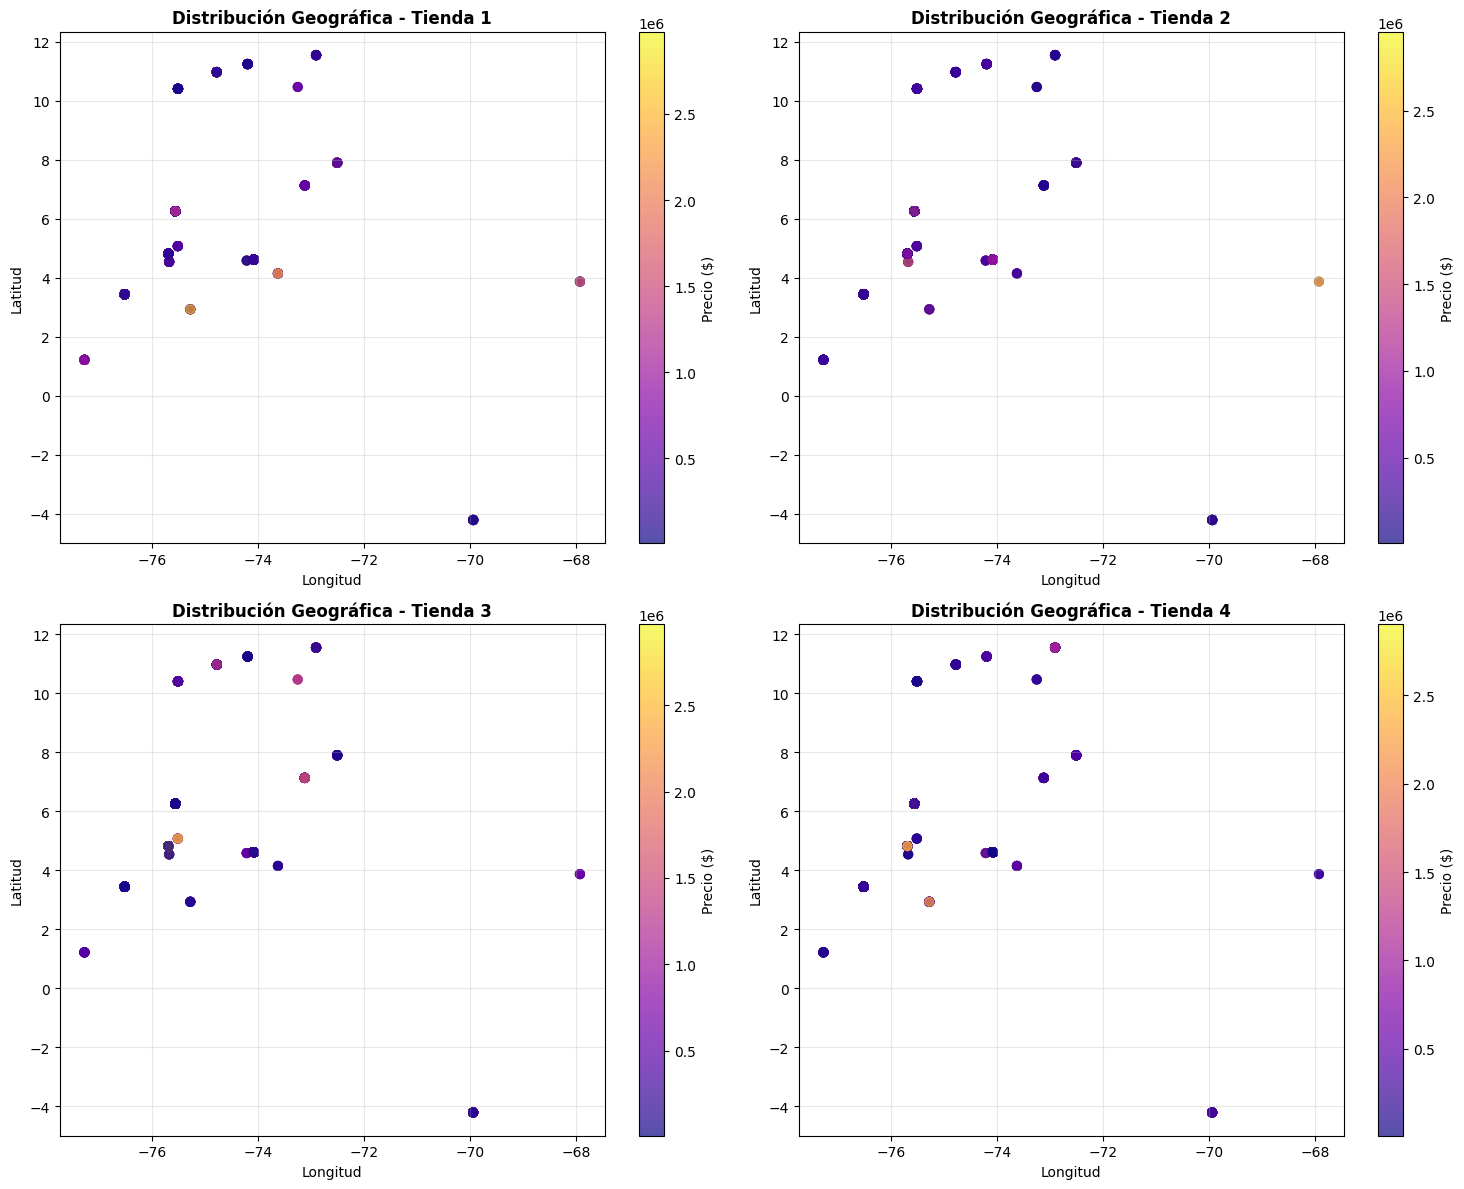

In [91]:
# Gráfico de dispersión por tienda
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

tiendas = datos_completos['Tienda'].unique()
colores = ['red', 'blue', 'green', 'orange']

for i, tienda in enumerate(tiendas):
    datos_tienda = datos_completos[datos_completos['Tienda'] == tienda]

    scatter = axes[i].scatter(datos_tienda['lon'], datos_tienda['lat'],
                             c=datos_tienda['Precio'], cmap='plasma',
                             alpha=0.7, s=40)
    axes[i].set_title(f'Distribución Geográfica - {tienda}', fontweight='bold')
    axes[i].set_xlabel('Longitud')
    axes[i].set_ylabel('Latitud')
    axes[i].grid(True, alpha=0.3)

    # Agregar barra de color para cada subplot
    plt.colorbar(scatter, ax=axes[i], label='Precio ($)')

plt.tight_layout()
plt.show()

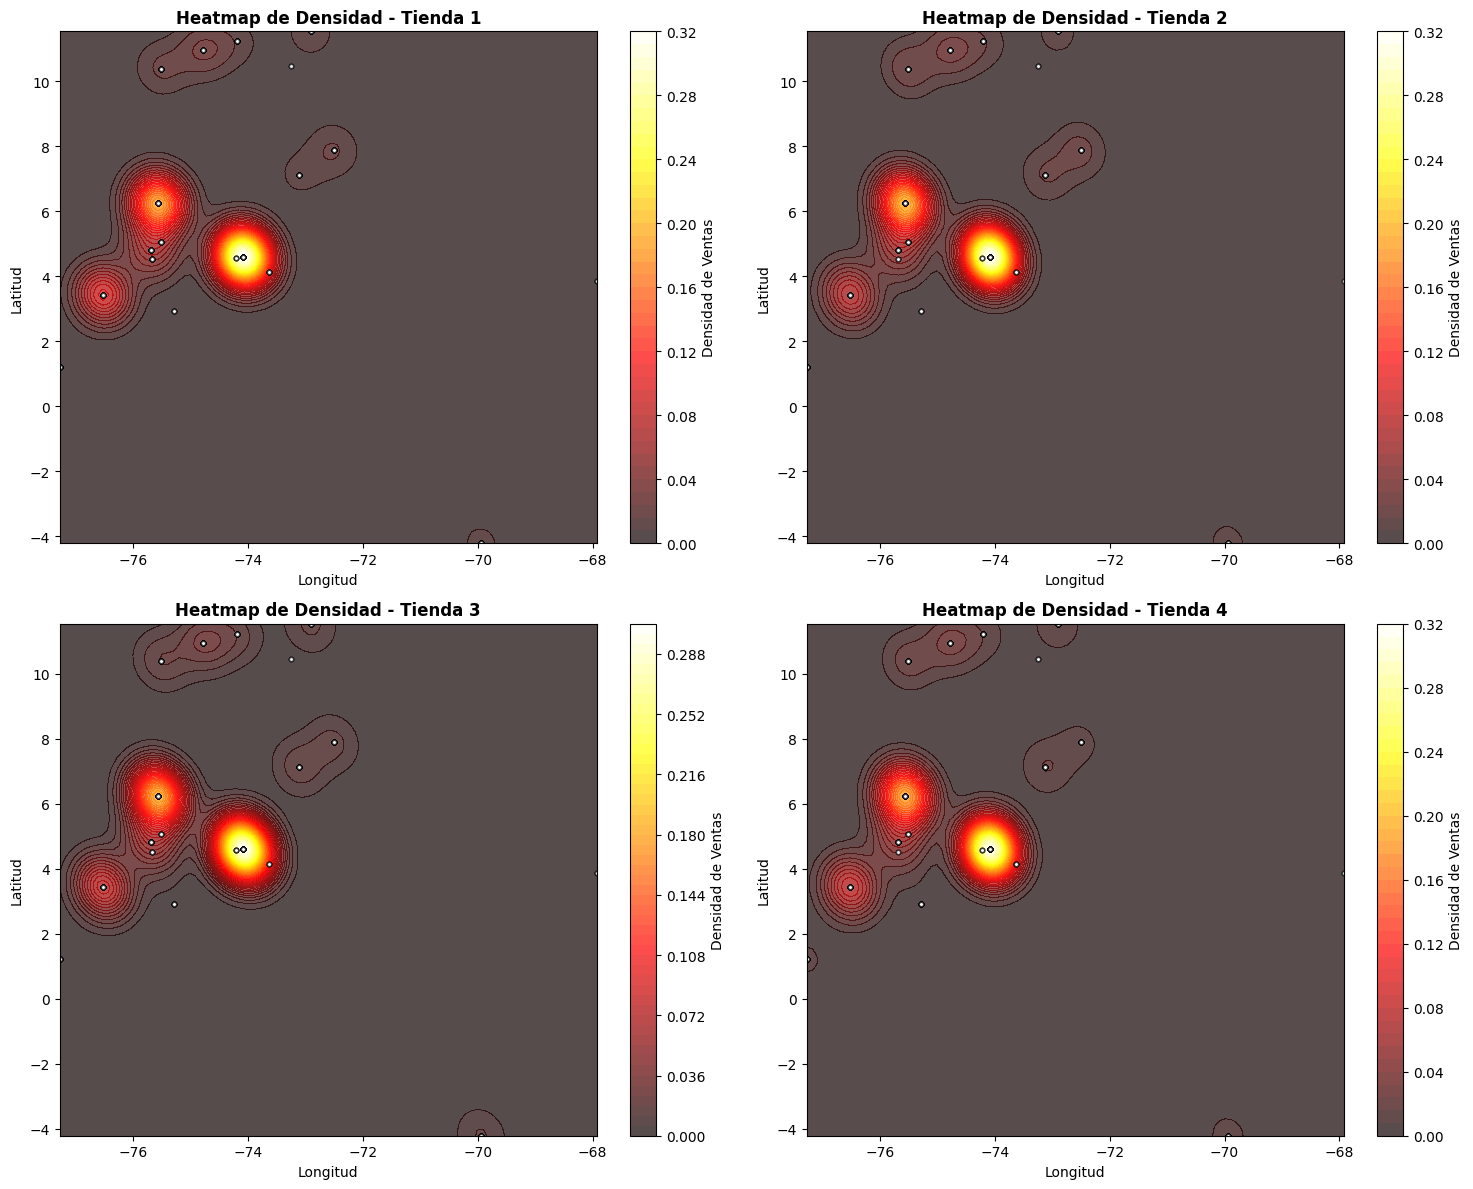

In [92]:
# Análisis de densidad - Heatmaps por tienda
from scipy.stats import gaussian_kde
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, tienda in enumerate(tiendas):
    datos_tienda = datos_completos[datos_completos['Tienda'] == tienda]

    # Calcular densidad
    x = datos_tienda['lon']
    y = datos_tienda['lat']

    # Crear grid para el heatmap
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)

    # Calcular densidad gaussiana
    try:
        zi = gaussian_kde(np.vstack([x, y]))(np.vstack([xi.flatten(), yi.flatten()]))
        zi = zi.reshape(xi.shape)

        # Plot heatmap
        contour = axes[i].contourf(xi, yi, zi, levels=50, cmap='hot', alpha=0.7)
        axes[i].scatter(x, y, alpha=0.5, s=10, color='white', edgecolors='black')
        axes[i].set_title(f'Heatmap de Densidad - {tienda}', fontweight='bold')
        axes[i].set_xlabel('Longitud')
        axes[i].set_ylabel('Latitud')

        plt.colorbar(contour, ax=axes[i], label='Densidad de Ventas')

    except Exception as e:
        axes[i].text(0.5, 0.5, f'Error en cálculo\nde densidad',
                    ha='center', va='center', transform=axes[i].transAxes)
        axes[i].set_title(f'{tienda} - Datos insuficientes')

plt.tight_layout()
plt.show()

In [93]:
# Análisis de ventas por ciudad para cada tienda
print("3. ANÁLISIS DE VENTAS POR CIUDAD Y TIENDA:")

ventas_por_ciudad_tienda = datos_completos.groupby(['Lugar de Compra', 'Tienda']).agg({
    'Precio': ['count', 'sum', 'mean'],
    'Calificación': 'mean',
    'Costo de envío': 'mean'
}).round(2)

ventas_por_ciudad_tienda.columns = ['Cantidad_Ventas', 'Ingreso_Total', 'Precio_Promedio',
                                   'Calificación_Promedio', 'Costo_Envío_Promedio']
print(ventas_por_ciudad_tienda)

3. ANÁLISIS DE VENTAS POR CIUDAD Y TIENDA:
                          Cantidad_Ventas  Ingreso_Total  Precio_Promedio  \
Lugar de Compra Tienda                                                      
Armenia         Tienda 1               14      4615700.0        329692.86   
                Tienda 2                4      3363200.0        840800.00   
                Tienda 3                7      3980300.0        568614.29   
                Tienda 4                3       283700.0         94566.67   
Barranquilla    Tienda 1               75     32907700.0        438769.33   
...                                   ...            ...              ...   
Valledupar      Tienda 4                4      1057000.0        264250.00   
Villavicencio   Tienda 1               11      7161900.0        651081.82   
                Tienda 2                6      3597100.0        599516.67   
                Tienda 3                5       988000.0        197600.00   
                Tienda 4         

<Figure size 1400x800 with 0 Axes>

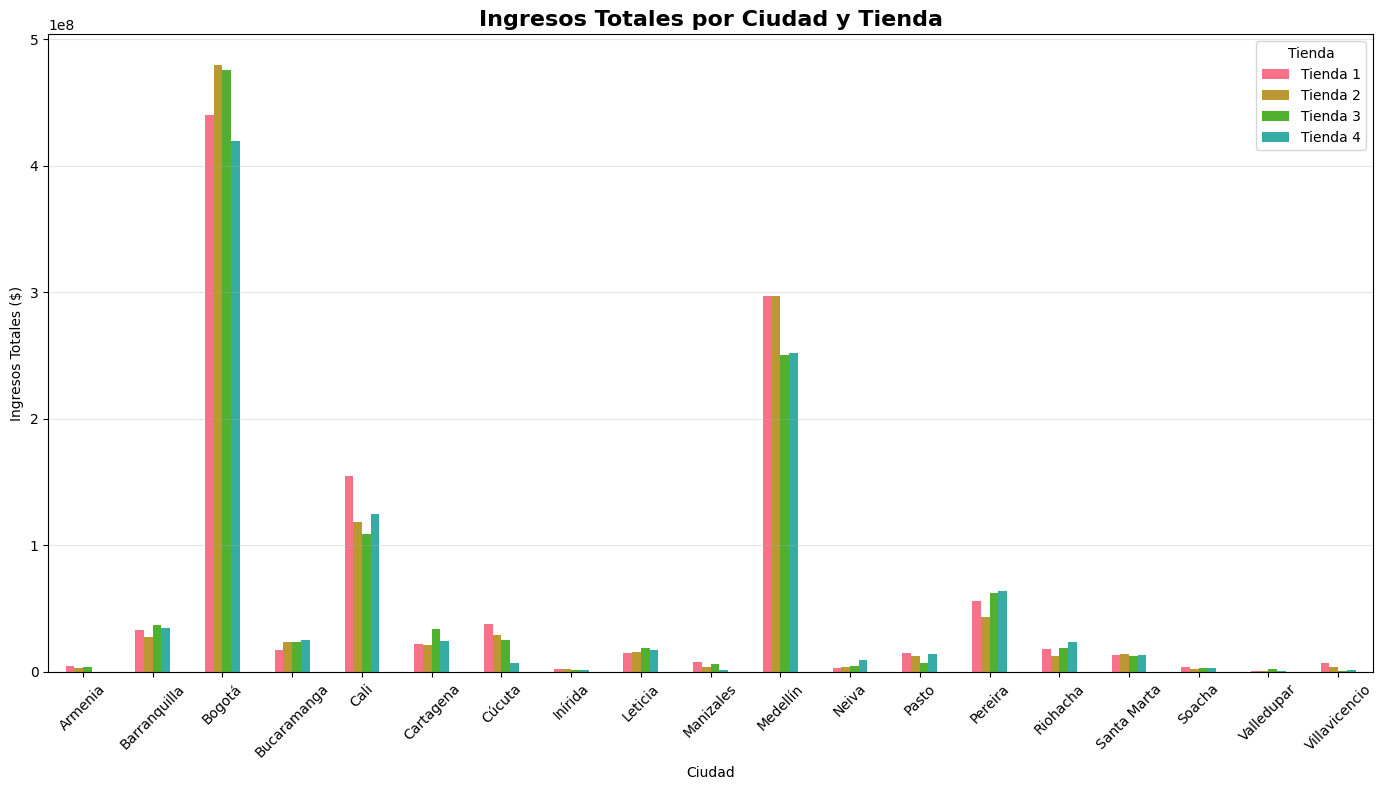

In [94]:
# Visualización de ingresos por ciudad y tienda
ingresos_ciudad_tienda = datos_completos.pivot_table(
    index='Lugar de Compra',
    columns='Tienda',
    values='Precio',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(14, 8))
ingresos_ciudad_tienda.plot(kind='bar', figsize=(14, 8))
plt.title('Ingresos Totales por Ciudad y Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Ciudad')
plt.ylabel('Ingresos Totales ($)')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

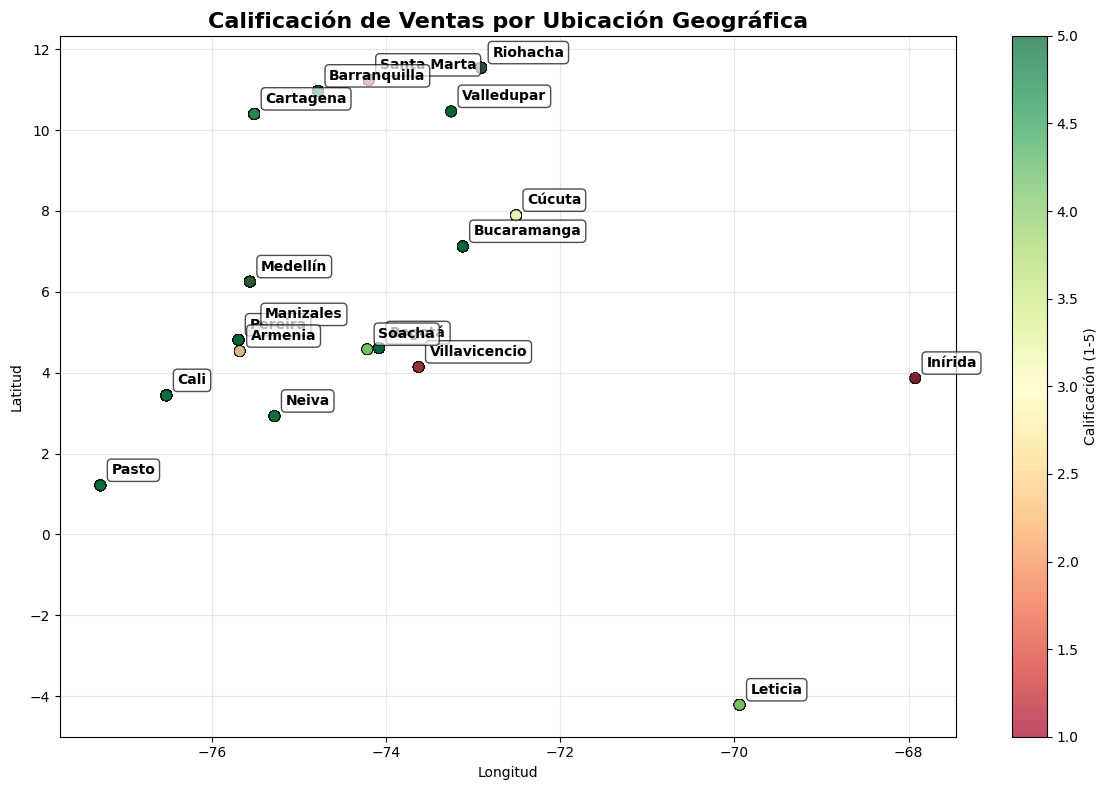

In [95]:
# Análisis de calificaciones por ubicación geográfica
plt.figure(figsize=(12, 8))
scatter = plt.scatter(datos_completos['lon'], datos_completos['lat'],
                     c=datos_completos['Calificación'], cmap='RdYlGn',
                     alpha=0.7, s=60, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Calificación (1-5)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Calificación de Ventas por Ubicación Geográfica', fontsize=16, fontweight='bold')

# Agregar etiquetas de ciudades
for _, row in coordenas_unicas.iterrows():
    plt.annotate(row['Lugar de Compra'],
                (row['lon'], row['lat']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

4. ANÁLISIS DE COSTOS DE ENVÍO POR UBICACIÓN:


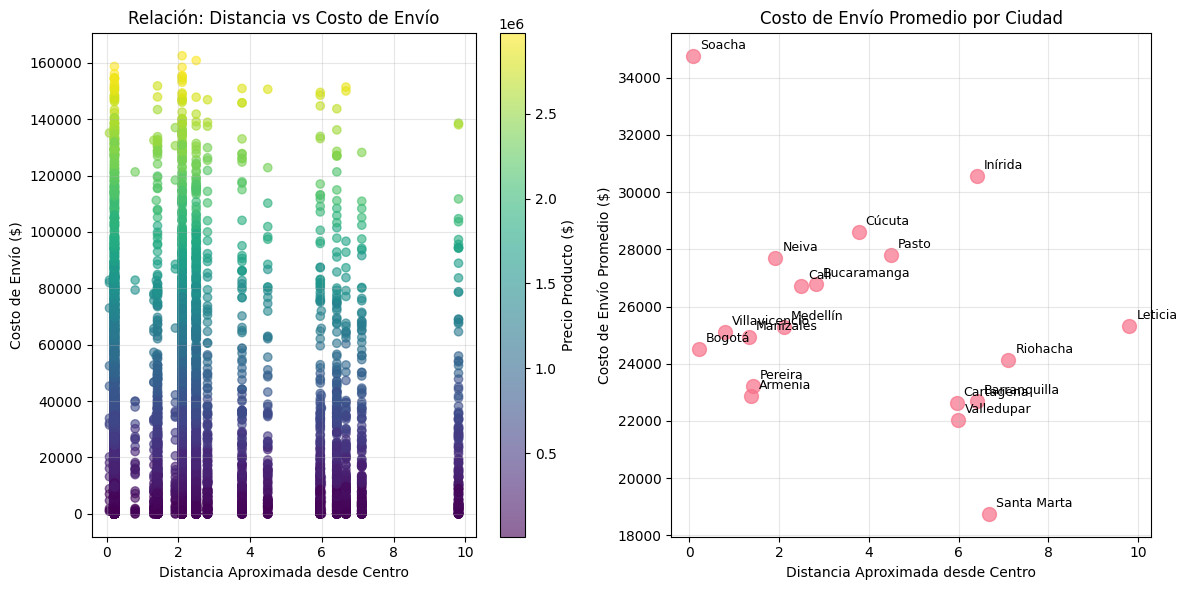

In [96]:
# Análisis de relación entre costo de envío y distancia
print("4. ANÁLISIS DE COSTOS DE ENVÍO POR UBICACIÓN:")

# Calcular "centro geográfico" aproximado de Colombia como referencia
centro_lat = 4.5709  # Aproximadamente Bogotá
centro_lon = -74.2973

# Calcular distancia aproximada desde el centro (simplificado)
datos_completos['distancia_aproximada'] = np.sqrt(
    (datos_completos['lat'] - centro_lat)**2 +
    (datos_completos['lon'] - centro_lon)**2
)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(datos_completos['distancia_aproximada'], datos_completos['Costo de envío'],
           alpha=0.6, c=datos_completos['Precio'], cmap='viridis')
plt.xlabel('Distancia Aproximada desde Centro')
plt.ylabel('Costo de Envío ($)')
plt.title('Relación: Distancia vs Costo de Envío')
plt.colorbar(label='Precio Producto ($)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Agrupar por ciudad para mejor visualización
costo_envio_ciudad = datos_completos.groupby('Lugar de Compra').agg({
    'Costo de envío': 'mean',
    'distancia_aproximada': 'mean'
}).reset_index()

plt.scatter(costo_envio_ciudad['distancia_aproximada'],
           costo_envio_ciudad['Costo de envío'], s=100, alpha=0.7)
plt.xlabel('Distancia Aproximada desde Centro')
plt.ylabel('Costo de Envío Promedio ($)')
plt.title('Costo de Envío Promedio por Ciudad')

# Etiquetar ciudades
for i, row in costo_envio_ciudad.iterrows():
    plt.annotate(row['Lugar de Compra'],
                (row['distancia_aproximada'], row['Costo de envío']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

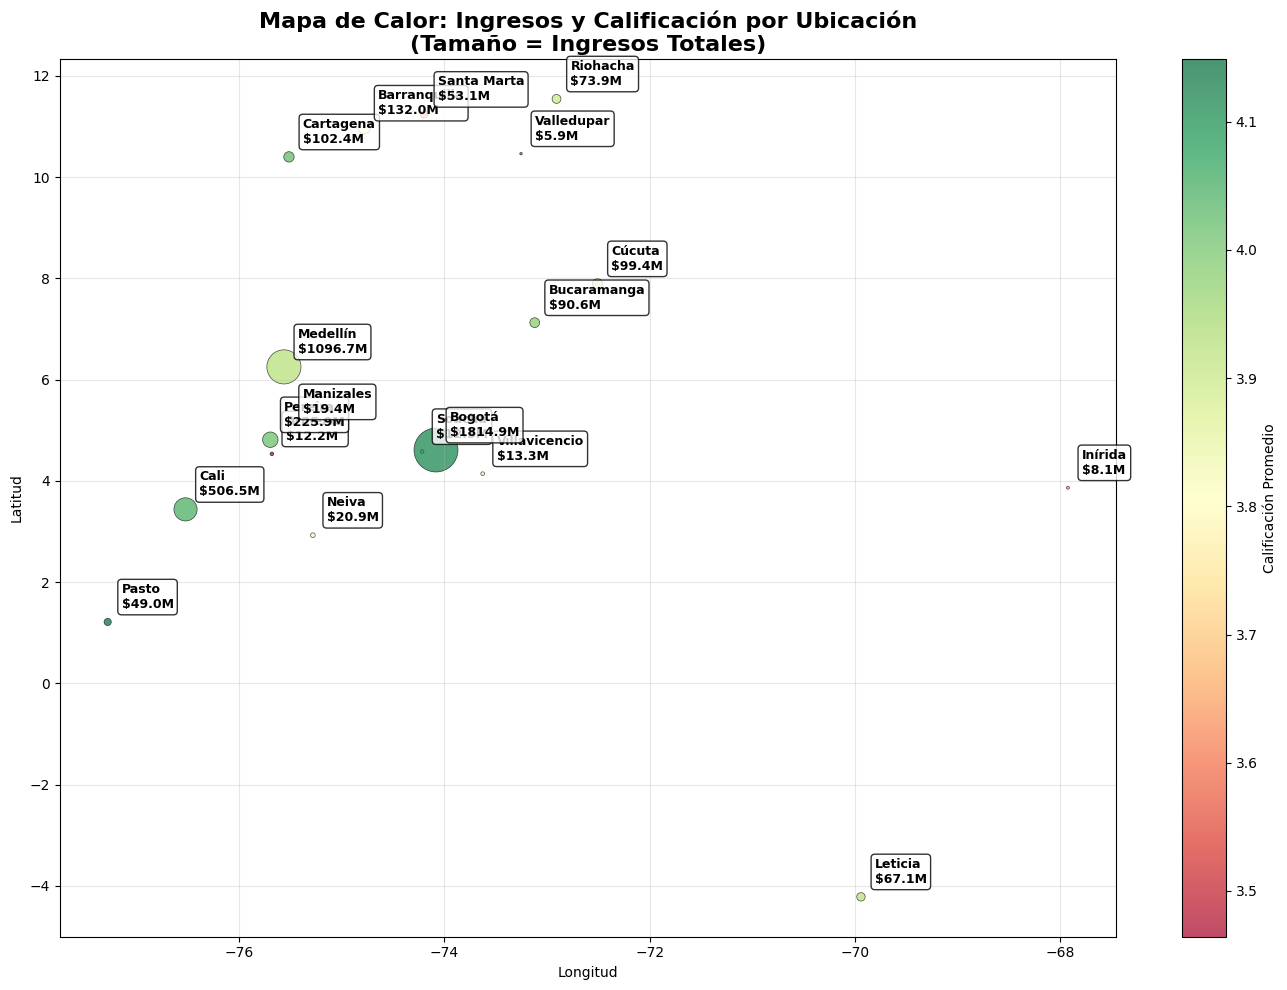

In [97]:
# Mapa de calor interactivo simple (usando scatter con tamaño variable)
plt.figure(figsize=(14, 10))

# Tamaño del punto basado en ingresos totales por ubicación
ingresos_por_ubicacion = datos_completos.groupby(['lat', 'lon', 'Lugar de Compra']).agg({
    'Precio': 'sum',
    'Calificación': 'mean',
    'Tienda': 'count'
}).reset_index()

# Normalizar el tamaño para la visualización
tamaño_puntos = (ingresos_por_ubicacion['Precio'] / ingresos_por_ubicacion['Precio'].max()) * 1000

scatter = plt.scatter(ingresos_por_ubicacion['lon'], ingresos_por_ubicacion['lat'],
                     s=tamaño_puntos, c=ingresos_por_ubicacion['Calificación'],
                     cmap='RdYlGn', alpha=0.7, edgecolors='black', linewidth=0.5)

plt.colorbar(scatter, label='Calificación Promedio')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de Calor: Ingresos y Calificación por Ubicación\n(Tamaño = Ingresos Totales)',
          fontsize=16, fontweight='bold')

# Etiquetar ciudades con sus ingresos
for i, row in ingresos_por_ubicacion.iterrows():
    plt.annotate(f"{row['Lugar de Compra']}\n${row['Precio']/1000000:.1f}M",
                (row['lon'], row['lat']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [98]:
# Análisis final: Patrones geográficos clave
print("=" * 70)
print("CONCLUSIONES GEOGRÁFICAS - PATRONES IDENTIFICADOS")
print("=" * 70)

# Identificar las ciudades con mejor y peor rendimiento
ciudades_analisis = datos_completos.groupby('Lugar de Compra').agg({
    'Precio': ['sum', 'mean'],
    'Calificación': 'mean',
    'Costo de envío': 'mean',
    'Tienda': 'count'
}).round(2)

ciudades_analisis.columns = ['Ingreso_Total', 'Precio_Promedio', 'Calificación_Promedio',
                            'Costo_Envío_Promedio', 'Total_Ventas']

# Top 5 ciudades por ingresos
top_ciudades = ciudades_analisis.nlargest(5, 'Ingreso_Total')
print("\nTOP 5 CIUDADES POR INGRESOS:")
print(top_ciudades)

# Bottom 5 ciudades por ingresos
bottom_ciudades = ciudades_analisis.nsmallest(5, 'Ingreso_Total')
print("\nBOTTOM 5 CIUDADES POR INGRESOS:")
print(bottom_ciudades)

# Análisis de correlación geográfica
print("\nCORRELACIONES GEOGRÁFICAS:")
correlaciones = datos_completos[['lat', 'lon', 'Precio', 'Calificación', 'Costo de envío']].corr()
print(correlaciones.round(3))

CONCLUSIONES GEOGRÁFICAS - PATRONES IDENTIFICADOS

TOP 5 CIUDADES POR INGRESOS:
                 Ingreso_Total  Precio_Promedio  Calificación_Promedio  \
Lugar de Compra                                                          
Bogotá            1.814858e+09        460273.47                   4.11   
Medellín          1.096669e+09        473927.92                   3.93   
Cali              5.065261e+08        503005.06                   4.05   
Pereira           2.259273e+08        436996.71                   4.01   
Barranquilla      1.320405e+08        425937.10                   3.80   

                 Costo_Envío_Promedio  Total_Ventas  
Lugar de Compra                                      
Bogotá                       24532.08          3943  
Medellín                     25282.02          2314  
Cali                         26726.81          1007  
Pereira                      23211.41           517  
Barranquilla                 22692.26           310  

BOTTOM 5 CIUDADES POR 

In [99]:
df.to_csv('datos_completos.csv', index=False)
